<span style="color:black;font-weight:700;font-size:35px"> 
                Анализ датасета видеоигр
</span>

**Цель работы:** нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**\
Name — название игры\
Platform — платформа\
Year_of_Release — год выпуска\
Genre — жанр игры\
NA_sales — продажи в Северной Америке (миллионы проданных копий)\
EU_sales — продажи в Европе (миллионы проданных копий)\
JP_sales — продажи в Японии (миллионы проданных копий)\
Other_sales — продажи в других странах (миллионы проданных копий)\
Critic_Score — оценка критиков (максимум 100)\
User_Score — оценка пользователей (максимум 10)\
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.\

В ходе работы будет выполнена предварительная обработка данных, в рамках которой будут обработаны пропуски, удалены дубликаты, преобразованы типы данных, приведены к нижнему регистру названия столбцов, также будет проведена оценка данных на предмет выбросов.

Следующим этапом работы будет исследовательский анализ данных в ходе, которого будут исследованы следующие вопросы:

1) Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

2) Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

3) Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.

4) Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

5) Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

6) Соотнесите выводы с продажами игр на других платформах.

7) Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

После чего будет составлен портрет пользователя каждого региона, в ходе которого будут выявлены: 
1) Самые популярные платформы (топ-5). Опишите различия в долях продаж.
2) Самые популярные жанры (топ-5). Поясните разницу.
3) Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Также будут проверены гипотезы.

1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2) Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

# Загрузка данных


In [2]:
try:
    games_df = pd.read_csv('/datasets/games.csv')
except:
    games_df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
games_df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games_df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


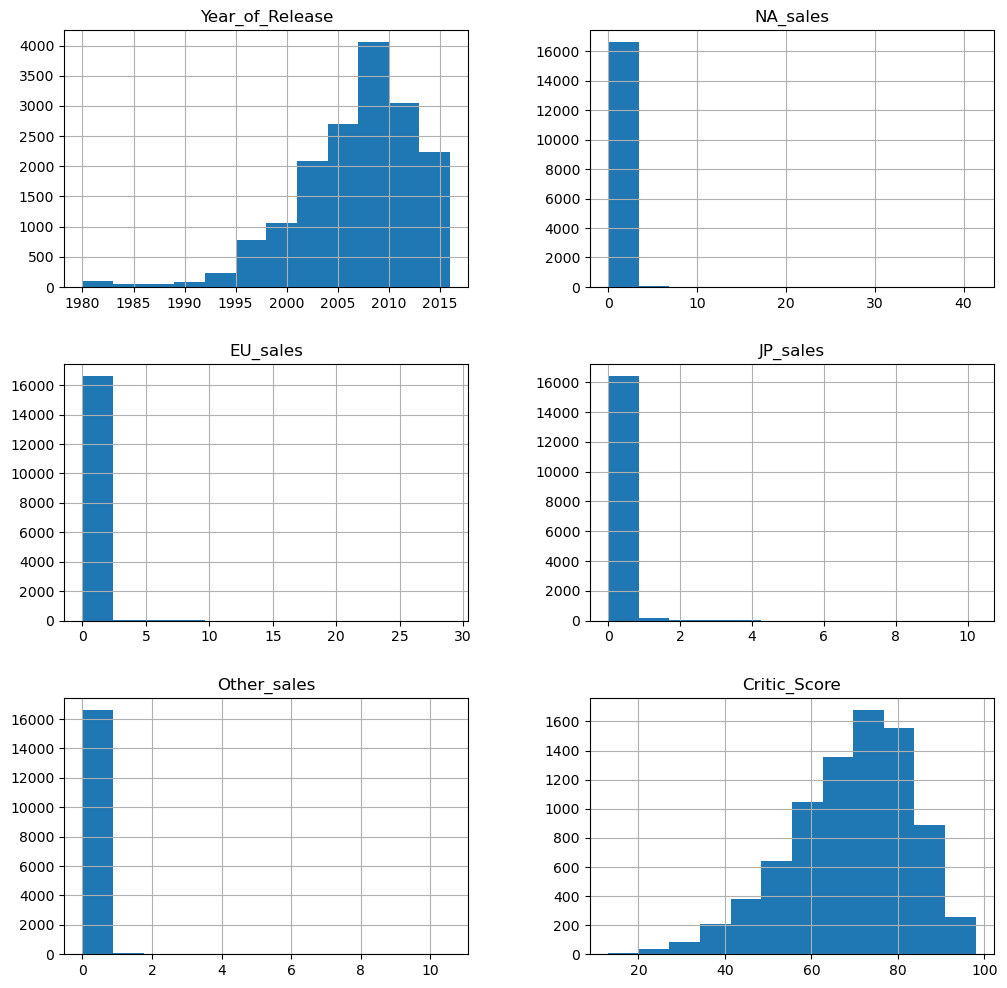

In [6]:
games_df.hist(bins=12,figsize=(12,12));

Датасет успешно загружен. Он содержит в себе 16715 записей и 11 столбцов. В атесете содержатся пропуски данных, которые будут обработаны, также для экономии памяти будут преобразовны типы данных, где это возможно с float на int. Также необходимо будет привести названия столбцов к нижнему регистру.

# Предобработка данных

Приведем название столбцов к нижнему регистру.


In [7]:
games_df.columns = [x.lower() for x in games_df.columns]

In [8]:
games_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Подсчитаем процент пропущенных значений в столбцах


In [9]:
(games_df.isnull().sum() / games_df.shape[0]) * 100

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

В столбцах name, year_of_realease, genre, critic_score, user_score, rating наблюдаются пропуски в данных, обработаем их.


In [10]:
games_df[games_df['name'].isnull() == True]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Строк с пропусками в колонках "name" и "genre" всего две. Возможно данные не указали при составлении таблицы.
Корректного способа заполнить эти пропуски нет, поэтому удалим такие строки.

In [11]:
games_df = games_df.dropna(subset=['name'])

In [12]:
(games_df.isnull().sum() / games_df.shape[0]) * 100

name                0.000000
platform            0.000000
year_of_release     1.609526
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.313349
user_score         40.082570
rating             40.471489
dtype: float64

In [13]:
games_df.year_of_release.isnull().sum()

269

В столбце year_of_release наблюдатеся 269 пропусков, будет корректнее удалить эти строки, так как обработка медианой или другой числовой характеристикой будет некорректна


In [14]:
games_df = games_df.dropna(subset=['year_of_release'])

In [15]:
games_df.year_of_release.isnull().sum()

0

Удалили пропуски в столбце year_of_release.

In [16]:
games_df['year_of_release'] = pd.to_datetime(games_df['year_of_release'], format='%Y').dt.year

Преобразовали формат столбца year_of_release в формат datetime

In [17]:
games_df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [18]:
games_df.critic_score.isnull().sum()

8461

В колонке "оценка критиков" есть некоторые пропущенные значения, и есть разные способы их заполнения. Один из возможных методов - использовать медианную оценку для каждой группы игр по их платформе и жанру. Однако, следует учесть, что такой подход может исказить данные.

Причины, по которым оценки критиков могли быть пропущены, могут включать технические сложности, отсутствие оценок на момент выхода игры, или просто нежелание оценивающего издания заниматься данной игрой. Это может быть связано с тем, что игра предназначена только для определенного региона, имеет необычный жанр или ориентирована на определенную возрастную категорию игроков.

В связи с этим, я предлагаю заменить пропущенные значения в этой колонке на -1, чтобы обозначить их как особую группу, учитывая, что оценка критиков является качественной переменной. Это позволит сохранить информацию о наличии пропусков и их особенностях, без искажения данных медианными значениями.

In [19]:
games_df['critic_score'] = games_df['critic_score'].fillna(-1)

Заполнили пропуски в столбце critic_score значением -1.

In [20]:
games_df.critic_score.isnull().sum()

0

In [21]:
games_df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [22]:
games_df.user_score.isnull().sum()

6605

Пропуски в столбце "user_score" могли бы быть заполнены с использованием медианной оценки на основе группировки по платформе и жанру игры. Однако, следует учесть, что такой подход может исказить данные.

Поскольку оценка пользователей является качественной переменной (порядковой), я предлагаю заменить пропущенные значения в столбце "оценка пользователей" на -1, чтобы обозначить их как особую группу. Это обусловлено возможными причинами отсутствия оценок пользователей, такими как технические проблемы или отсутствие оценок из-за особенностей рынка.

Пропуски могли возникнуть, например, если игра была выпущена только для ограниченной аудитории, имеет непопулярный жанр или предназначена для конкретной возрастной группы, что могло уменьшить интерес пользователей к её оценке. Замена на -1 позволит сохранить информацию о наличии пропусков, не искажая данные средними значениями.

In [23]:
games_df['user_score'].unique() #Посмотрим на содержимое колонки

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [24]:
games_df[games_df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,-1.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,-1.0,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,-1.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,-1.0,tbd,E


Значение tdb означает - to be determined («будет определено»), эти значения можно обработать значениеи NaN после чего заполнить значения -1. Как это было сделано выше.

In [25]:
games_df['user_score'] = games_df['user_score'].replace('tbd', np.nan)

In [26]:
games_df.user_score.isnull().sum()

8981

In [27]:
games_df['user_score'] = games_df['user_score'].fillna(-1)

In [28]:
games_df.user_score.isnull().sum()

0

In [29]:
games_df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Игры с разным жанром могут иметь разные возрастные ограничения. Кроме того, некоторым играм могло быть не присвоено возрастное ограничение.

Пропуски с возрастной категорией заменю на маркерное значение "nr"(Нет рейтинга).

In [30]:
games_df['rating'] = games_df['rating'].fillna('nr')

In [31]:
games_df['rating'].unique()

array(['E', 'nr', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [32]:
(games_df.isnull().sum() / games_df.shape[0]) * 100

name               0.0
platform           0.0
year_of_release    0.0
genre              0.0
na_sales           0.0
eu_sales           0.0
jp_sales           0.0
other_sales        0.0
critic_score       0.0
user_score         0.0
rating             0.0
dtype: float64

Преобразуем типы данных в столбцах

In [33]:
games_df.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [34]:
convert_to_int_columns = ['year_of_release', 'critic_score']

for column in convert_to_int_columns:
    games_df[column] = games_df[column].astype(int)

In [35]:
games_df['user_score'] = games_df['user_score'].astype(float)

In [36]:
games_df.dtypes

name                object
platform            object
year_of_release      int32
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         int32
user_score         float64
rating              object
dtype: object

In [37]:
games_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,nr
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,nr


Преобразовали типы данных в столбцах 'year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales','critic_score' с float на int, так как это поможет сэкономить пямять. Также преобразуем столбец user_score c object на float.

Добавим новый столбец total_sales, который будет содержать в себе общую сумму продаж по всем регионам.

In [38]:
games_df['total_sales'] = games_df['na_sales'] + games_df['eu_sales'] + games_df['jp_sales'] + games_df['other_sales']
column_to_move = 'total_sales'
new_position = 8

games_df.insert(new_position, column_to_move, games_df.pop(column_to_move))

In [39]:
games_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,-1,-1.0,nr
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,-1,-1.0,nr


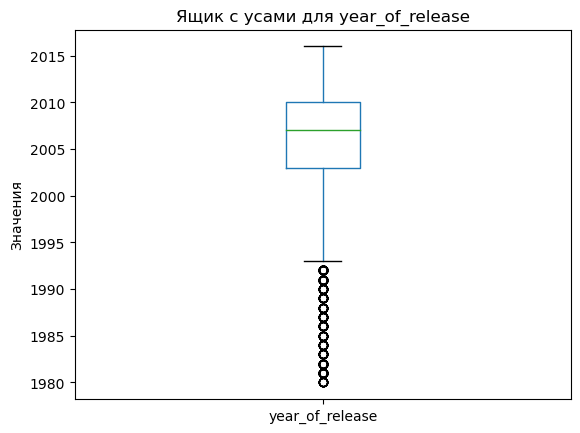

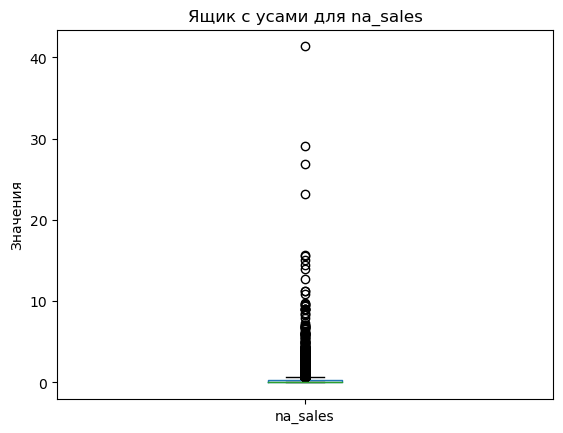

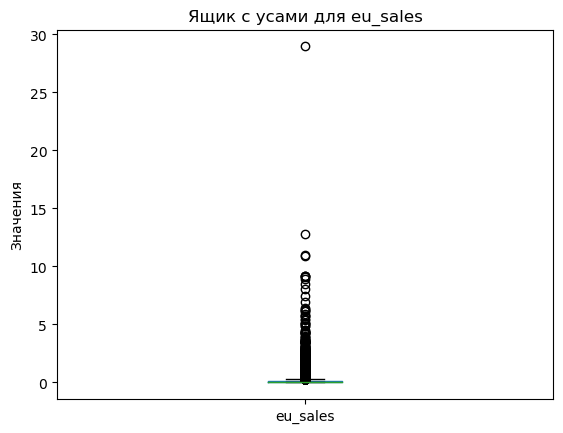

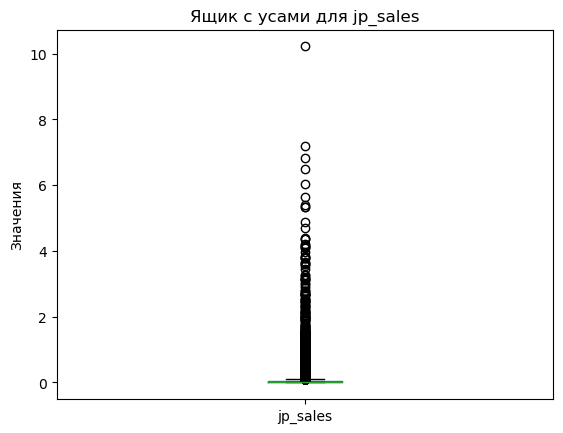

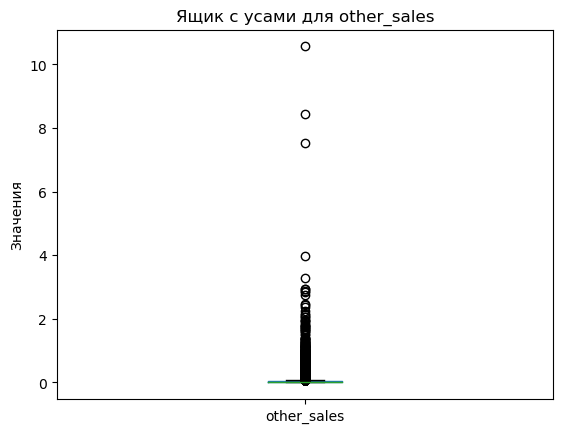

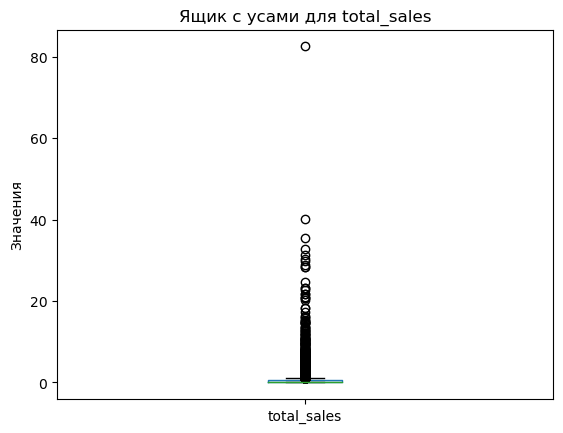

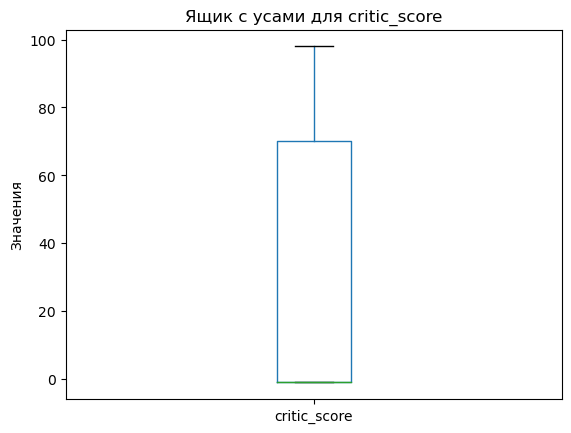

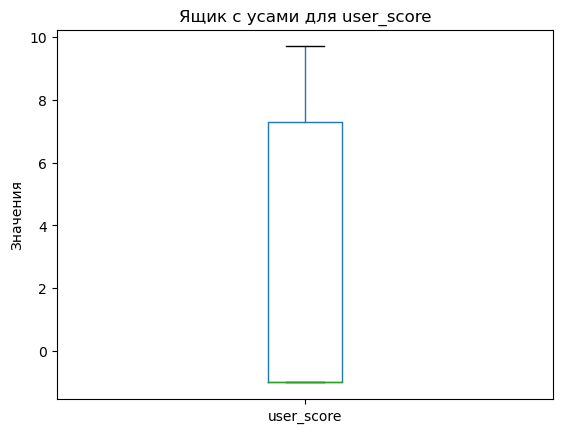

In [40]:
numeric_columns = games_df.select_dtypes(include=['number'])

for column in numeric_columns.columns:
    plt.figure() 
    numeric_columns.boxplot(column=column)
    plt.title(f'Ящик с усами для {column}')
    plt.ylabel('Значения')
    plt.grid(False)

# Отображаем все графики
plt.show()

Удалим неявные дубликаты в столбце name, year_of_release, platform

In [41]:
games_df['name_lower'] = games_df['name'].str.lower()
duplicates = games_df[games_df.duplicated(subset=['name_lower', 'platform', 'year_of_release'], keep=False)]

duplicates

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating,name_lower
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,2.56,83,5.5,E,madden nfl 13
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,0.01,83,5.5,E,madden nfl 13


In [42]:
games_df.drop_duplicates(subset=['name_lower', 'platform', 'year_of_release'], keep='first', inplace=True)
games_df.drop(columns=['name_lower'], inplace=True) # Удалим временный столбец "name_lower"

In [43]:
games_df[(games_df['platform'] == 'DS') & (games_df['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,0.02,-1,-1.0,nr


In [44]:
index_to_drop = games_df[(games_df['platform'] == 'DS') & (games_df['year_of_release'] == 1985)].index
games_df.drop(index = index_to_drop, inplace=True)

**Вывод**

В ходе предобработки данных приведены названия столбцов к нижнему регистру. 

Строк с пропусками в колонках "name" и "genre" всего две. Возможно данные не указали при составлении таблицы. Корректного способа заполнить эти пропуски нет, поэтому удалим такие строки.

Удалили пропуски в столбце year_of_release.

В колонке "оценка критиков" есть некоторые пропущенные значения, и есть разные способы их заполнения. Один из возможных методов - использовать медианную оценку для каждой группы игр по их платформе и жанру. Однако, следует учесть, что такой подход может исказить данные.

Причины, по которым оценки критиков могли быть пропущены, могут включать технические сложности, отсутствие оценок на момент выхода игры, или просто нежелание оценивающего издания заниматься данной игрой. Это может быть связано с тем, что игра предназначена только для определенного региона, имеет необычный жанр или ориентирована на определенную возрастную категорию игроков.

В связи с этим, я предлагаю заменить пропущенные значения в этой колонке на -1, чтобы обозначить их как особую группу, учитывая, что оценка критиков является качественной переменной. Это позволит сохранить информацию о наличии пропусков и их особенностях, без искажения данных медианными значениями.

Пропуски в столбце "user_score" могли бы быть заполнены с использованием медианной оценки на основе группировки по платформе и жанру игры. Однако, следует учесть, что такой подход может исказить данные.

Поскольку оценка пользователей является качественной переменной (порядковой), я предлагаю заменить пропущенные значения в столбце "оценка пользователей" на -1, чтобы обозначить их как особую группу. Это обусловлено возможными причинами отсутствия оценок пользователей, такими как технические проблемы или отсутствие оценок из-за особенностей рынка.

Пропуски могли возникнуть, например, если игра была выпущена только для ограниченной аудитории, имеет непопулярный жанр или предназначена для конкретной возрастной группы, что могло уменьшить интерес пользователей к её оценке. Замена на -1 позволит сохранить информацию о наличии пропусков, не искажая данные средними значениями.Значение tdb означает - to be determined («будет определено»), эти значения можно обработать значениеи NaN после чего заполнить значения -1.

Игры с разным жанром могут иметь разные возрастные ограничения. Кроме того, некоторым играм могло быть не присвоено возрастное ограничение.

Пропуски с возрастной категорией заменю на маркерное значение "nr"(Нет рейтинга).

Преобразовали типы данных в столбцах 'year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales','critic_score' с float на int, так как это поможет сэкономить пямять. Также преобразуем столбец user_score c object на float.

Добавили новый столбец total_sales, который будет содержать в себе общую сумму продаж по всем регионам.

# Исследовательский анализ данных

**Посмотрим сколько игр выпускалось в разные годы**

In [45]:
games_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,-1,-1.0,nr
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,-1,-1.0,nr


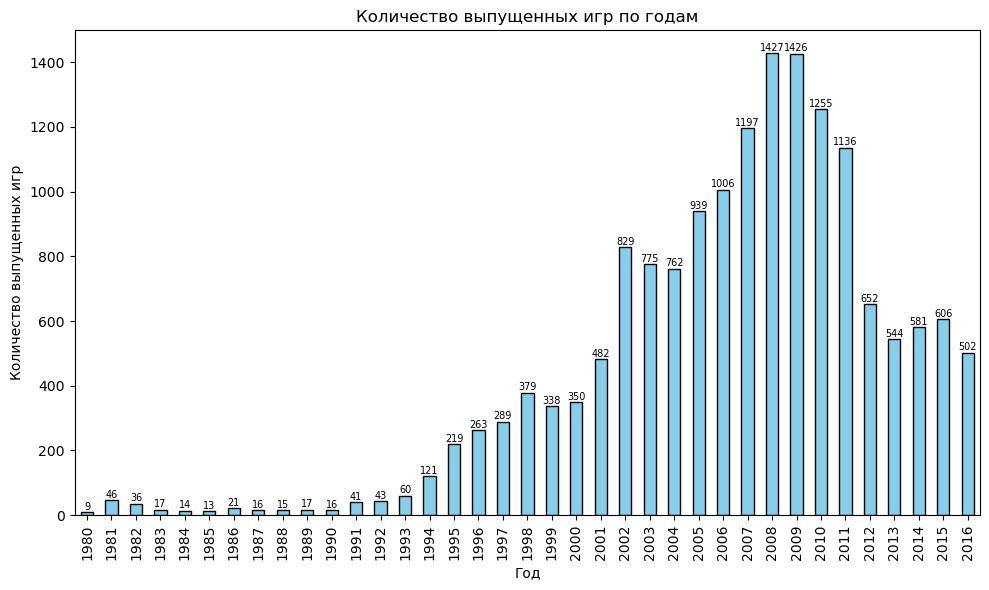

In [46]:
fig, ax = plt.subplots(figsize=(10, 6))

counts_years = games_df['year_of_release'].value_counts().sort_index(ascending=True)
counts_years.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')

for i, v in enumerate(counts_years):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=7)

plt.xlabel('Год')
plt.ylabel('Количество выпущенных игр')
plt.title('Количество выпущенных игр по годам')
plt.xticks(rotation=90)
plt.tight_layout() 
plt.show()


Из графика можно определить, что с 1991 по 2008 год наблюдался значительный рост в производстве компьютерных игр, достигнув пика в 2008 году, когда было выпущено рекордное количество игр - 1427 штука. После этого момента производство игр начало снижаться. До 1991 года количество выпущенных игр оставалось относительно стабильным.

Перед 1990 годом доминировали старые игровые консоли, поэтому количество выпускаемых игр было ограничено. С появлением  в 1991 году нового поколения игровой консоли, началось активное распространение видеоигр, что способствовало их увеличению. 2008 год также совпадает с началом Мирового экономического кризиса, что оказало отрицательное влияние на индустрию, и количество выпускаемых игр начало снижаться.

In [47]:
platform_sales = games_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_10_platforms_sales = platform_sales.head(10)
top_10_platforms_sales_names = top_10_platforms_sales.index.to_list()
top_10_platforms_sales_names

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

**Посчитаем как менялись продажи по платформам**

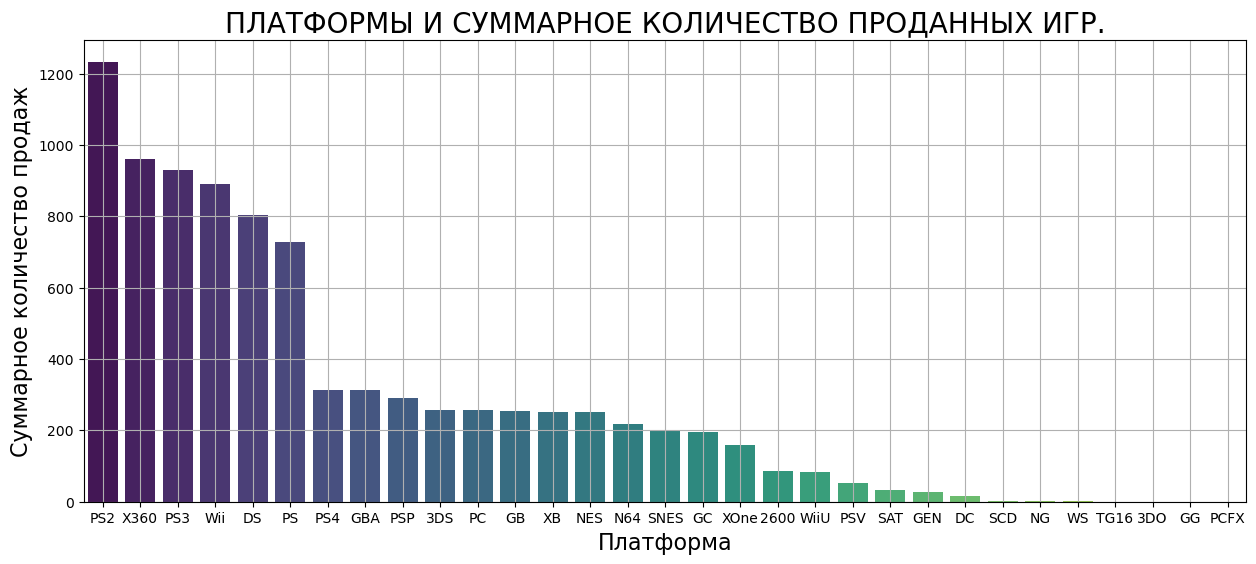

In [48]:
platform_total_sales = games_df.pivot_table(index='platform',values='total_sales',aggfunc='sum')\
        .sort_values(by='total_sales',ascending=False)

fig, ax = plt.subplots(figsize=(15, 6))

sns.barplot(data=platform_total_sales, x=platform_total_sales.index, y='total_sales', palette='viridis', ax=ax)
plt.xlabel('Платформа',fontsize=16)
plt.ylabel('Суммарное количество продаж',fontsize=16)
plt.title('ПЛАТФОРМЫ И СУММАРНОЕ КОЛИЧЕСТВО ПРОДАННЫХ ИГР.', fontsize=20)
plt.grid(True)
plt.show()

Как можно заметить явно выделяются 6 платформ  по количеству проданных игр. Отсутствие в этом ряду популярных моделей по типу PS4 и XOne может быть обусловлено тем, что это достатчно новые платформы и на них выпущено еще мало игр.

In [49]:
top_6_platform = platform_total_sales.head(6)
top_6_platform_names = top_6_platform.index.to_list()
top_6_platform_names

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

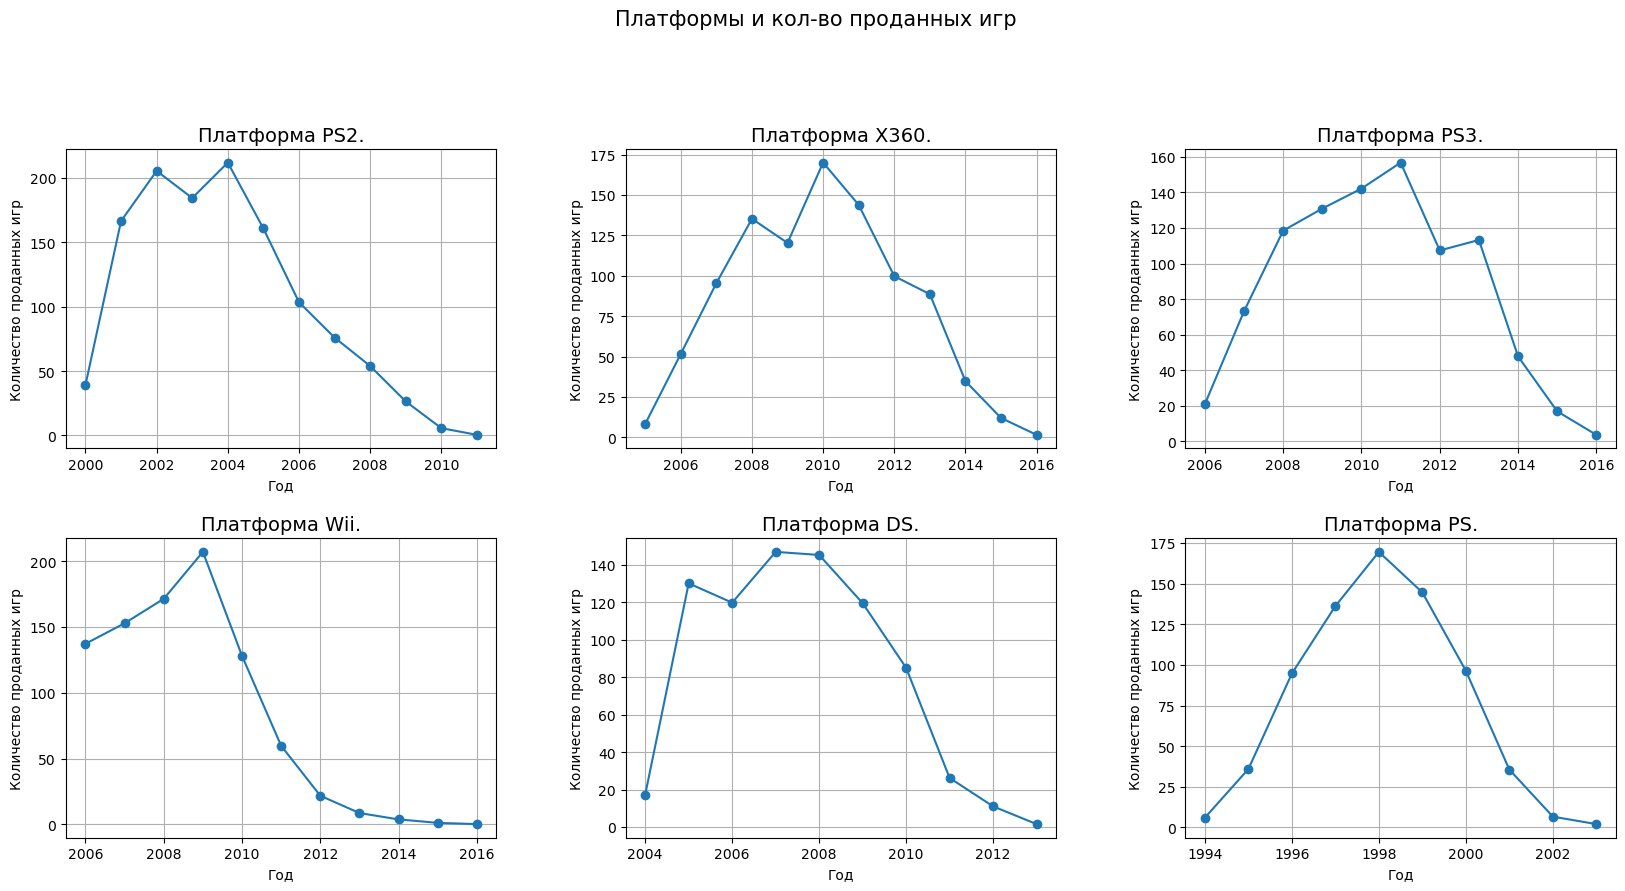

In [50]:
position = 0
plt.figure(figsize=[20, 14])
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.suptitle('Платформы и кол-во проданных игр', fontsize=15)

for platform in top_6_platform_names:
    position += 1
    plt.subplot(3, 3, position) 
    pivot_for_platform = games_df.query('platform == @platform')\
                                 .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    
    plt.plot(pivot_for_platform.index, pivot_for_platform['total_sales'], 'o-', alpha=1)
    plt.title(f'Платформа {platform}.', fontsize=14)
    plt.xlabel('Год')
    plt.ylabel('Количество проданных игр')
    plt.grid(True)

plt.show()
None

Как можно заметить из графика каждая платформа имеет свой пик продаж в определенное время, который как правило наступает спустя несколько лет после выпуска платформы. После которого следует спад и к 2016 почти все платформы на графиках имеют тенденцию спада количества выпускаемых игр.

Посчиатем продолжительность жизни самых популярных  платформ.

In [51]:
platform_duration_list = []

for platform in top_6_platform_names:
    platform_duration = games_df.query('platform == @platform').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').count()
    print(f'Продолжительность жизни платформы {platform}: {platform_duration.values[0]} лет')
    platform_duration_list.append(platform_duration.values[0])

Продолжительность жизни платформы PS2: 12 лет
Продолжительность жизни платформы X360: 12 лет
Продолжительность жизни платформы PS3: 11 лет
Продолжительность жизни платформы Wii: 11 лет
Продолжительность жизни платформы DS: 10 лет
Продолжительность жизни платформы PS: 10 лет


Рассчитаем среднее длини жизни платформы

In [52]:
mean_life_duration = int(np.mean(platform_duration_list))
print(f'Средняя продолжительность жизненного цикла платформы - {mean_life_duration} лет.')

Средняя продолжительность жизненного цикла платформы - 11 лет.


**Актуальный период**\
Возьмем данные начиная с 2011 года так как в среднем если смотреть по самым продаваемым платформам, за 5-6 лет платформа набирает свой максимум продаж или же наоборот ее продажи сильно падают относительно пика.

In [53]:
games_df_for_forecast = games_df.query('year_of_release > 2011')
games_df_for_forecast.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,21.05,97,8.2,M
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,16.27,97,8.1,M
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,14.63,-1,-1.0,nr
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,14.60,-1,-1.0,nr
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,13.79,83,5.3,M
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,13.68,83,4.8,M
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,12.62,97,8.3,M
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,11.68,-1,-1.0,nr
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,10.24,73,2.6,M
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,9.90,78,7.2,E


In [54]:
pvt_tbl_for_platform = games_df_for_forecast.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
pvt_tbl_for_platform

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,51.36,56.57,43.76,27.78,15.14
DS,11.01,1.54,NaN,NaN,NaN
PC,23.22,12.38,13.28,8.52,5.25
PS3,107.35,113.25,47.76,16.82,3.60
PS4,NaN,25.99,100.00,118.90,69.25
PSP,7.69,3.14,0.24,0.12,NaN
PSV,16.19,10.59,11.90,6.25,4.25
Wii,21.71,8.59,3.75,1.14,0.18
WiiU,17.56,21.65,22.03,16.35,4.60


Text(158.22222222222223, 0.5, 'Год')

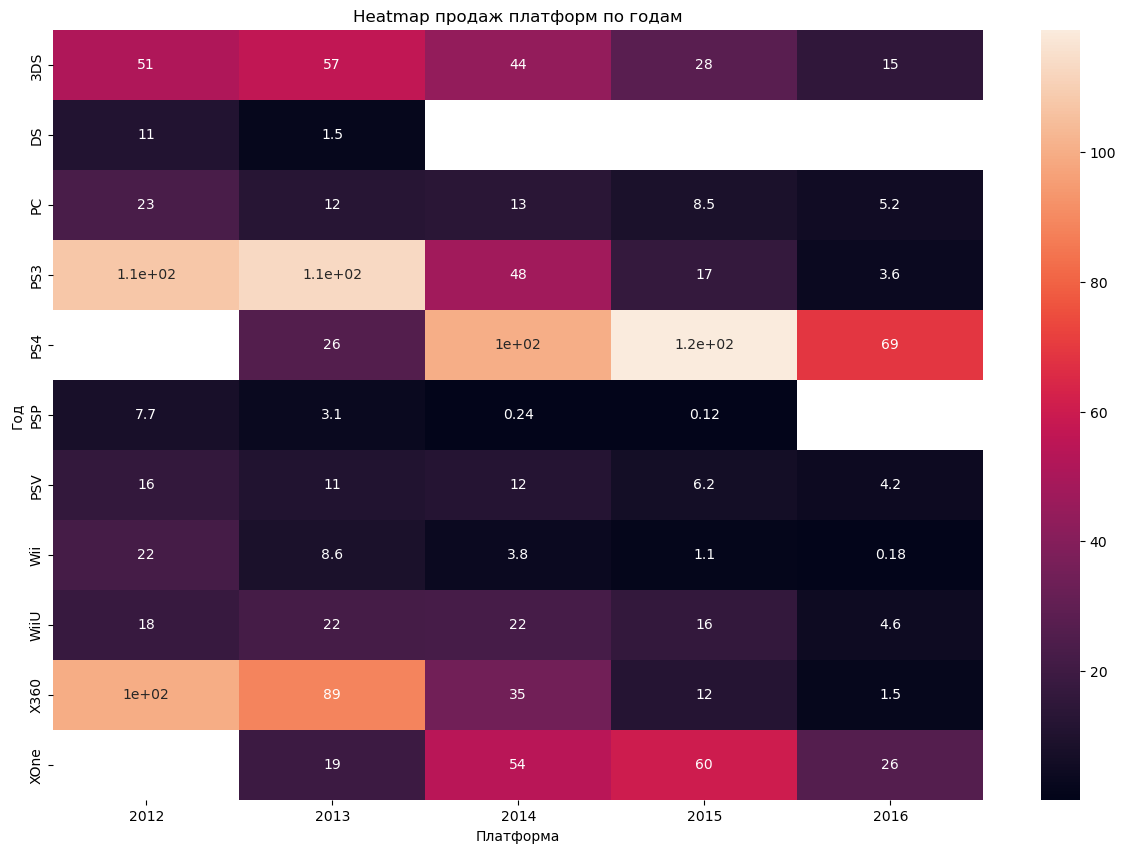

In [55]:
plt.figure(figsize=(15,10))
plt.title('Heatmap продаж платформ по годам')
sns.heatmap(pvt_tbl_for_platform, annot=True)
plt.xlabel('Платформа')
plt.ylabel('Год')

Потенциально прибыльными платформами могут быть следующие платформы: PS4, XOne, 3DS, PC, WiiU, PSV. Многие платформы к 2016 либо не выпускают продукцию, либо их продажи стремительно падают.Потенциально самой прибыльной я считаю , может стать PS4 так как относительно  пика в 2015 году , эта платформа учитывая прошлые выводы, будет еще несколько лет иметь макс. продажи, то же самое можно сказать и про XOne.

Построим график «ящик с усами» по глобальным продажам игр по потенциально прибыльным платформам.

In [56]:
perspective_platform = ['PS4', 'XOne', '3DS', 'PC', 'WiiU','PSV']
games_df_with_perspective_platform = games_df_for_forecast[games_df_for_forecast['platform'].isin(perspective_platform)]
games_df_with_perspective_platform.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,14.63,-1,-1.0,nr
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,14.60,-1,-1.0,nr
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,12.62,97,8.3,M
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,11.68,-1,-1.0,nr
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,9.90,78,7.2,E


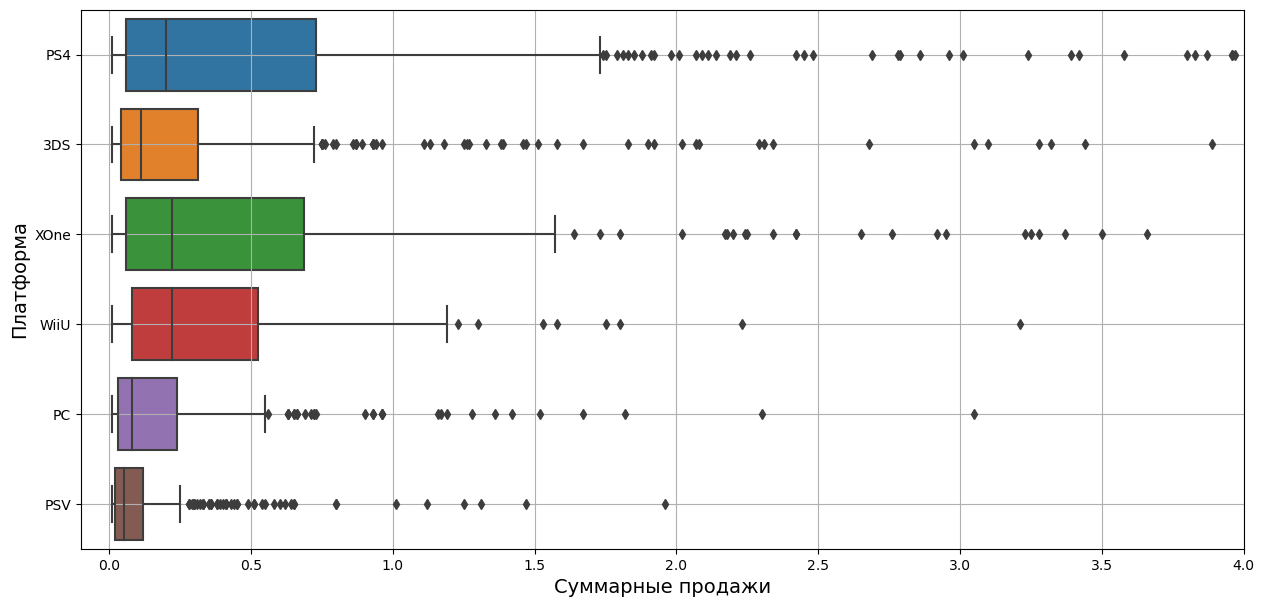

In [57]:
plt.figure(figsize=(15,7))
plt.xlim(-0.1,4)
sns.boxplot(x='total_sales', y='platform', data=games_df_with_perspective_platform)
plt.xlabel('Суммарные продажи',fontsize=14)
plt.ylabel('Платформа',fontsize=14)
plt.grid(True);
plt.show()

Исходя из графика можно сказать, что больше всего продаж имеют платформы PS4, XOne и WiiU. Медиана этих лидеров больше, чем у других платформ, что говорит, больших медианных доходах. Также можно сказать, что у лидеров шире размах усов, что говорит о том, что в этот диапазон попадает большее число значений. 

Посмотрите, как влияют на продажи внутри платформы PS4 отзывы пользователей и критиков.

In [58]:
ps_4_df = games_df_with_perspective_platform[(games_df_with_perspective_platform['platform'] == 'PS4') &
                                            (games_df_with_perspective_platform['critic_score'] != -1) &
                                            (games_df_with_perspective_platform['user_score'] != -1)]
ps_4_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,12.62,97,8.3,M
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,8.58,82,4.3,E
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,7.66,83,5.7,M
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,7.60,85,5.0,E
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,7.17,87,6.5,M


<Figure size 1200x600 with 0 Axes>

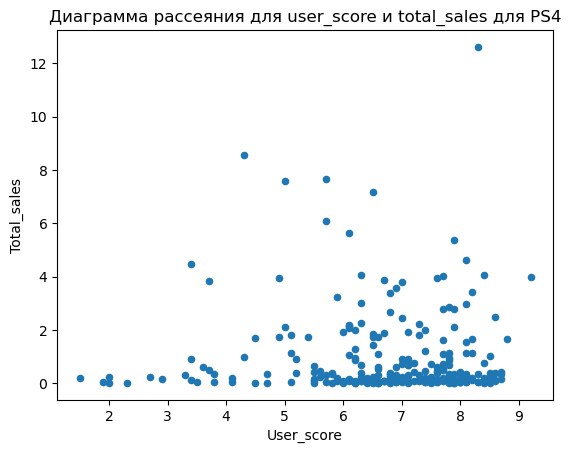

In [59]:
plt.figure(figsize=(12,6))

ps_4_df.plot.scatter(x='user_score',y='total_sales')
plt.title('Диаграмма рассеяния для user_score и total_sales для PS4')
plt.ylabel('Total_sales')
plt.xlabel('User_score')
plt.show()

<Figure size 1200x600 with 0 Axes>

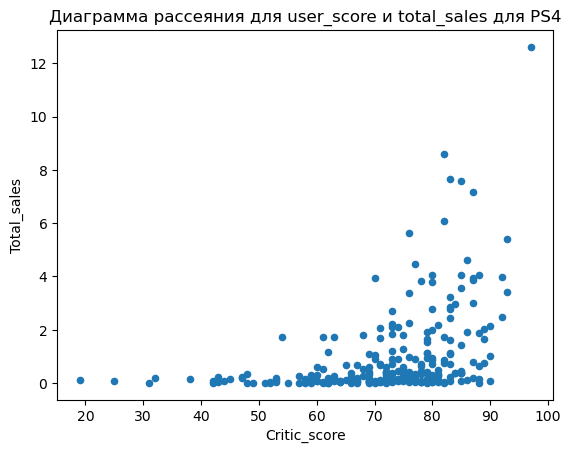

In [60]:
plt.figure(figsize=(12,6))
ps_4_df.plot.scatter(x='critic_score',y='total_sales')
plt.title('Диаграмма рассеяния для user_score и total_sales для PS4')
plt.ylabel('Total_sales')
plt.xlabel('Critic_score')
plt.show()

In [61]:
corr_with_user_score = ps_4_df['user_score'].corr(ps_4_df['total_sales'])
corr_with_critic_score = ps_4_df['critic_score'].corr(ps_4_df['total_sales'])
print(f'Коэф-т корреляции между пользовательской оценкой и суммарными продажами {corr_with_user_score}')
print(f'Коэф-т корреляции между оценкой критиков и суммарными продажами {corr_with_critic_score}')

Коэф-т корреляции между пользовательской оценкой и суммарными продажами -0.03362497596528878
Коэф-т корреляции между оценкой критиков и суммарными продажами 0.40589480145836687


Наблюдается положительный коэф-т корреляции между суммарными продажами и оценкой критиков, соответственно, можно сказать, что чем выше оценка критиков, тем выше суммарные продажи.\
Между оценкой пользователя и продажами наблюдается почти нулевая корреляция.

In [83]:
def scaterr_builder(platform_name):

    platform_df = games_df_with_perspective_platform[(games_df_with_perspective_platform['platform'] == platform_name) &
                                            (games_df_with_perspective_platform['critic_score'] != -1) &
                                            (games_df_with_perspective_platform['user_score'] != -1)]
    
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='total_sales', data=platform_df, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=platform_df, ax=ax[1])
    fig.suptitle(platform_name, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[0].set(ylabel='Суммарные продажи')
    ax[1].set(xlabel='Оценка критиков')
    ax[1].set(ylabel='Суммарные продажи')
    plt.show()
    
    
    corr_with_user_score = platform_df['user_score'].corr(platform_df['total_sales'])
    corr_with_critc_score = platform_df['critic_score'].corr(platform_df['total_sales'])    
    print(f'Коэф-т корреляции между пользовательской оценкой и суммарными продажами {corr_with_user_score}')
    print(f'Коэф-т корреляции между оценкой критиков и суммарными продажами {corr_with_critic_score}')
    print('\n')

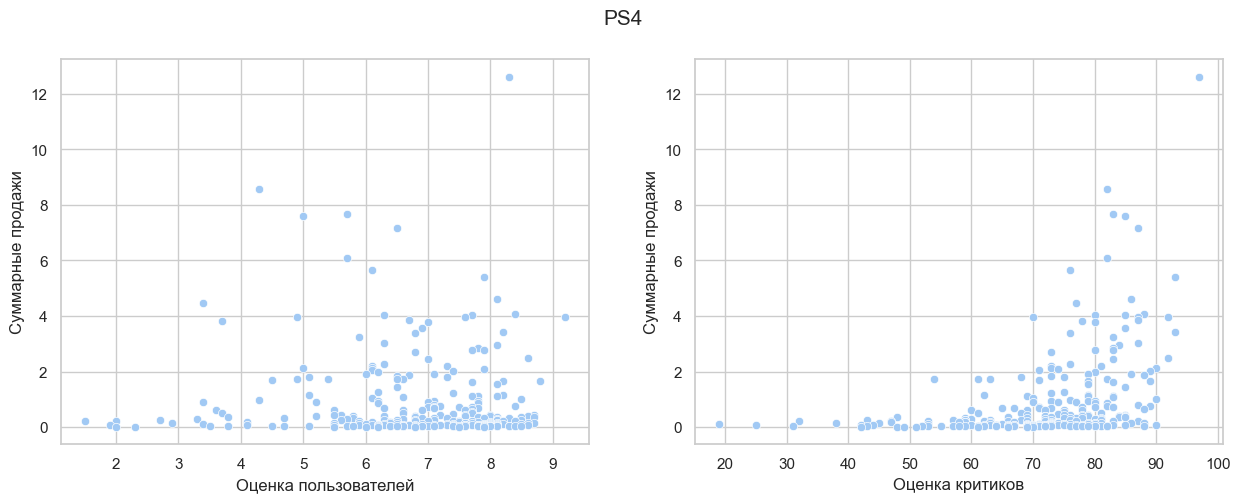

Коэф-т корреляции между пользовательской оценкой и суммарными продажами -0.03362497596528878
Коэф-т корреляции между оценкой критиков и суммарными продажами 0.40589480145836687




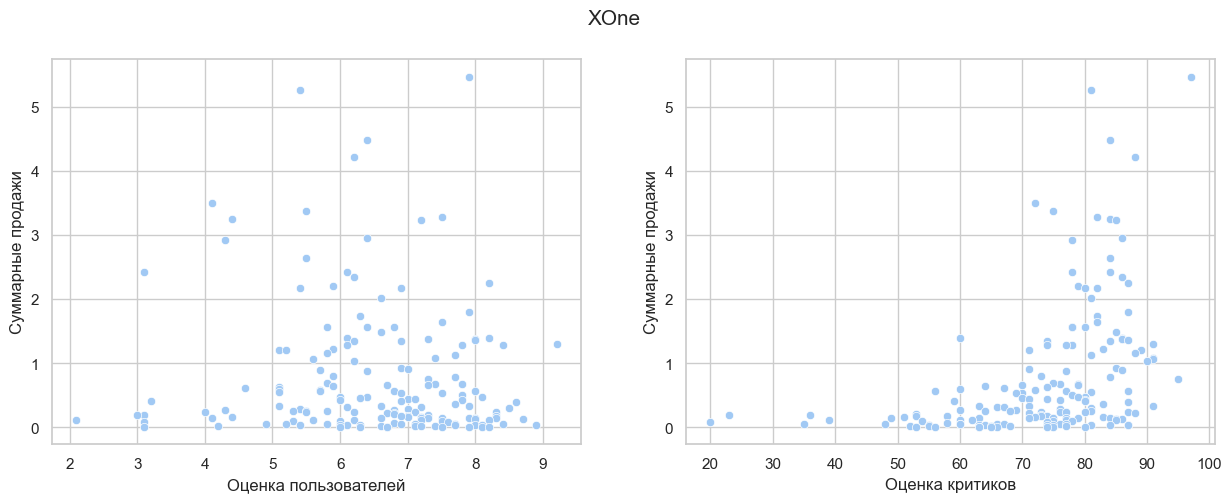

Коэф-т корреляции между пользовательской оценкой и суммарными продажами -0.09400318326920852
Коэф-т корреляции между оценкой критиков и суммарными продажами 0.40589480145836687




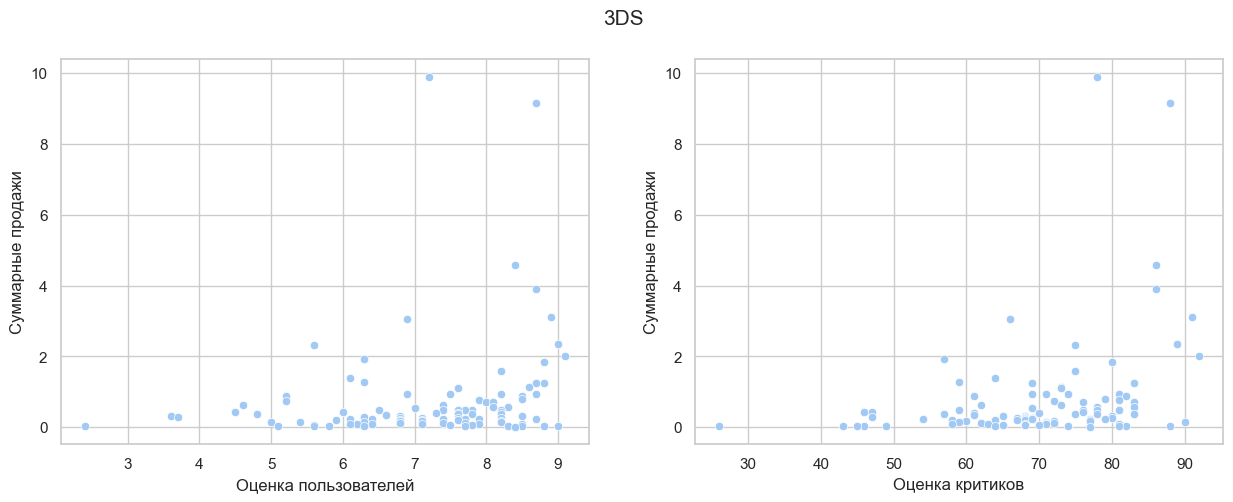

Коэф-т корреляции между пользовательской оценкой и суммарными продажами 0.20181255007655283
Коэф-т корреляции между оценкой критиков и суммарными продажами 0.40589480145836687




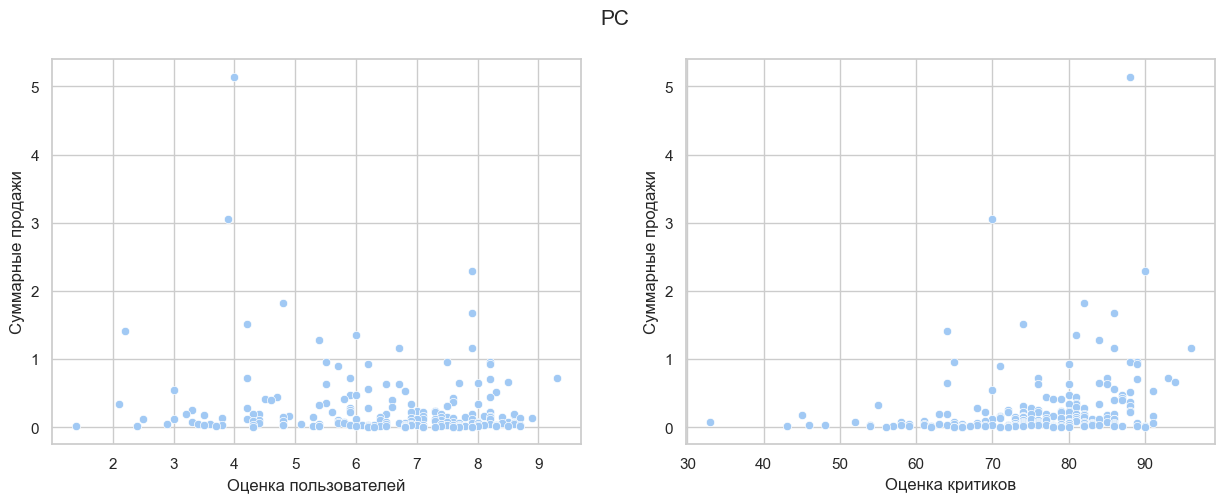

Коэф-т корреляции между пользовательской оценкой и суммарными продажами -0.1369335107338787
Коэф-т корреляции между оценкой критиков и суммарными продажами 0.40589480145836687




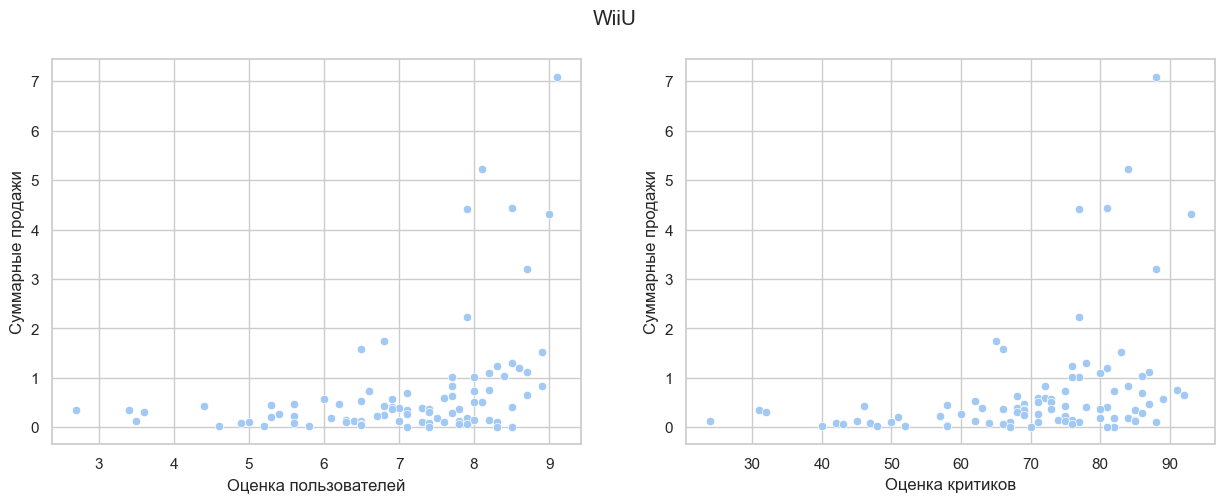

Коэф-т корреляции между пользовательской оценкой и суммарными продажами 0.3918479505297129
Коэф-т корреляции между оценкой критиков и суммарными продажами 0.40589480145836687




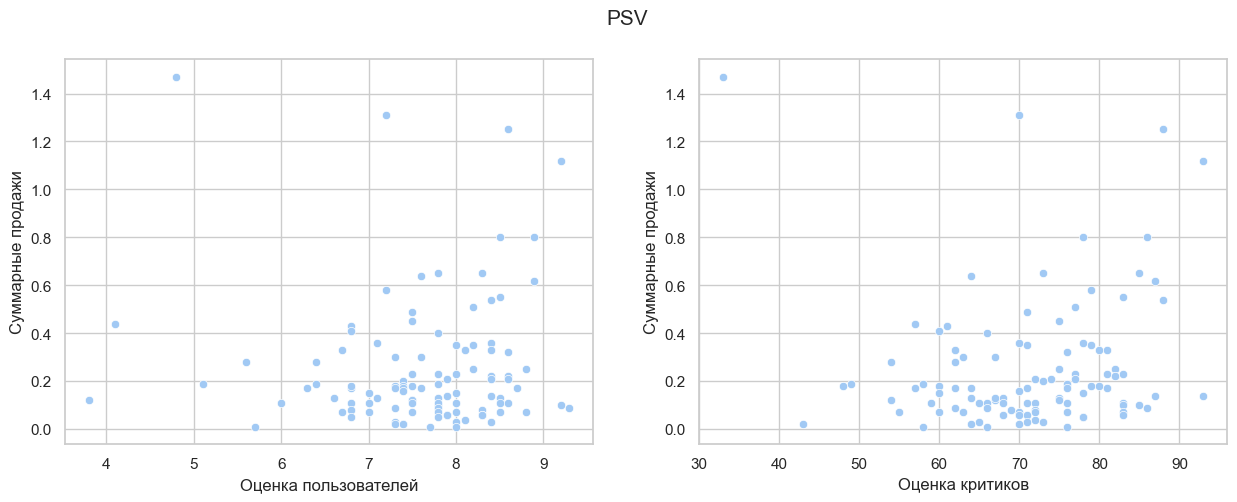

Коэф-т корреляции между пользовательской оценкой и суммарными продажами 0.013902409906331152
Коэф-т корреляции между оценкой критиков и суммарными продажами 0.40589480145836687




In [84]:
for platform in perspective_platform:
    scaterr_builder(platform)

Можно отметить, для всех платформ наблюдается положительная корреляция между оценкой критиков и суммарными продажами, и также почти для всех платформ, немного слабее положительная корреляция между оценкой пользователя и суммарными продажами.

Соответсвенно, можно отметить, что чем выше оценки игры, тем с большей вероятностью у нее будут выше продажи.Поэтому интернет-магазину выгоднее продавать игры с хорошими оценками.

Посмотрим на общее распределение игр по жанрам.

In [64]:
games_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,-1,-1.0,nr
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,-1,-1.0,nr


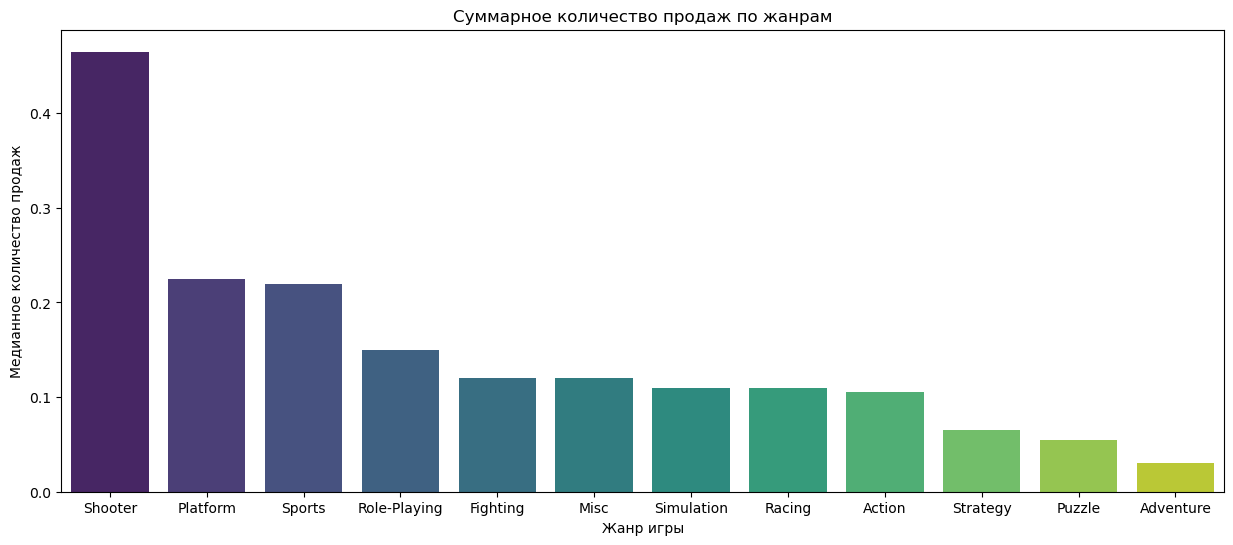

In [65]:
genre_disrib = games_df_with_perspective_platform.pivot_table(index='genre', values='total_sales', aggfunc=np.median).sort_values(by='total_sales',ascending=False)
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data=genre_disrib, x=genre_disrib.index, y='total_sales', palette='viridis', ax=ax)
plt.title('Суммарное количество продаж по жанрам')
plt.xlabel('Жанр игры')
plt.ylabel('Медианное количество продаж')
plt.show()

Из графика можно сделать вывод, что Shooter самый популярный жанр игры по продажам. Также популярны такие жанры как: Platform, Sports, Role-Playing.

<span style="color:black;font-weight:700;font-size:20px"> 
    Вывод
</span>

Можно определить, что с 1991 по 2008 год наблюдался значительный рост в производстве компьютерных игр, достигнув пика в 2008 году, когда было выпущено рекордное количество игр. После этого момента производство игр начало снижаться. До 1991 года количество выпущенных игр оставалось относительно стабильным.

Перед 1990 годом доминировали старые игровые консоли, поэтому количество выпускаемых игр было ограничено. С появлением в 1991 году нового поколения игровой консоли, началось активное распространение видеоигр, что способствовало их увеличению. 2008 год также совпадает с началом Мирового экономического кризиса, что оказало отрицательное влияние на индустрию, и количество выпускаемых игр начало снижаться.

Каждая платформа имеет свой пик продаж в определенное время, который как правило наступает спустя несколько лет после выпуска платформы. После которого следует спад и к 2016 почти все платформы на графиках имеют тенденцию спада количества выпускаемых игр.

Также можно отметить, что в среднем -  **средняя продолжительность жизненного цикла платформы - 11 лет.**

**Потенциально прибыльными платформами могут быть следующие платформы: PS4, XOne, 3DS, PC, WiiU, PSV.** Многие платформы к 2016 либо не выпускают продукцию, либо их продажи стремительно падают.Потенциально самой прибыльной я считаю , может стать PS4 так как относительно пика в 2015 году , эта платформа учитывая прошлые выводы, будет еще несколько лет иметь макс. продажи, то же самое можно сказать и про XOne

Больше всего продаж имеют платформы PS4, XOne и WiiU. Медиана этих лидеров больше, чем у других платформ, что говорит, больших медианных доходах. Также можно сказать, что у лидеров шире размах усов, что говорит о том, что в этот диапазон попадает большее число значений.

Можно отметить, для всех платформ наблюдается положительная корреляция между оценкой критиков и суммарными продажами, и также почти для всех платформ, немного слабее положительная корреляция между оценкой пользователя и суммарными продажами.

Соответсвенно, можно отметить, что чем выше оценки игры, тем с большей вероятностью у нее будут выше продажи.Поэтому интернет-магазину выгоднее продавать игры с хорошими оценками.

Анализ жанров показал, что Shooter самый популярный жанр игры по продажам. Также популярны такие жанры как: Platform, Sports, Role-Playing.

# Портрет пользователя каждого региона.


**Определим самые популярные платформы.**

Создадим датасет для каждого региона

In [66]:
na_df = games_df_for_forecast.loc[:,'name':'genre']
na_df['na_sales'] = games_df_for_forecast['na_sales']
na_df['rating'] = games_df_for_forecast['rating']

na_df.head()

,name,platform,year_of_release,genre,na_sales,rating
16,Grand Theft Auto V,PS3,2013,Action,7.02,M
23,Grand Theft Auto V,X360,2013,Action,9.66,M
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,nr
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,nr
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,M


In [67]:
eu_df = games_df_for_forecast.loc[:,'name':'genre']
eu_df['eu_sales'] = games_df_for_forecast['eu_sales']
eu_df['rating'] = games_df_for_forecast['rating']
eu_df.head()

,name,platform,year_of_release,genre,eu_sales,rating
16,Grand Theft Auto V,PS3,2013,Action,9.09,M
23,Grand Theft Auto V,X360,2013,Action,5.14,M
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,5.86,nr
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,4.19,nr
34,Call of Duty: Black Ops II,PS3,2012,Shooter,5.73,M


In [68]:
jp_df = games_df_for_forecast.loc[:,'name':'genre']
jp_df['jp_sales'] = games_df_for_forecast['jp_sales']
jp_df['rating'] = games_df_for_forecast['rating']
jp_df.head()

,name,platform,year_of_release,genre,jp_sales,rating
16,Grand Theft Auto V,PS3,2013,Action,0.98,M
23,Grand Theft Auto V,X360,2013,Action,0.06,M
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,0.36,nr
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,4.35,nr
34,Call of Duty: Black Ops II,PS3,2012,Shooter,0.65,M


In [69]:
def pvt_table_and_plt_bar(region_df, region_name, index):
    pvt_table = region_df.pivot_table(index=index, values=f'{region_name}_sales', aggfunc='sum')\
                              .sort_values(by=f'{region_name}_sales', ascending=False)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=pvt_table, x=pvt_table.index, y=f'{region_name}_sales')
    plt.title(f'Самые популярные {index} в регионе {region_name}')
    plt.xlabel(f'{index}')
    plt.ylabel('Суммарное количество продаж')
    plt.show()
    
    total_region_sales = pvt_table[f'{region_name}_sales'].sum()
    pvt_table[f'{region_name}_sales_percent'] = ((pvt_table[f'{region_name}_sales'] / total_region_sales) * 100).round(1)
    
    print(f"\nСводная таблица по продажам в {region_name}:")
    display(pvt_table.head(5))

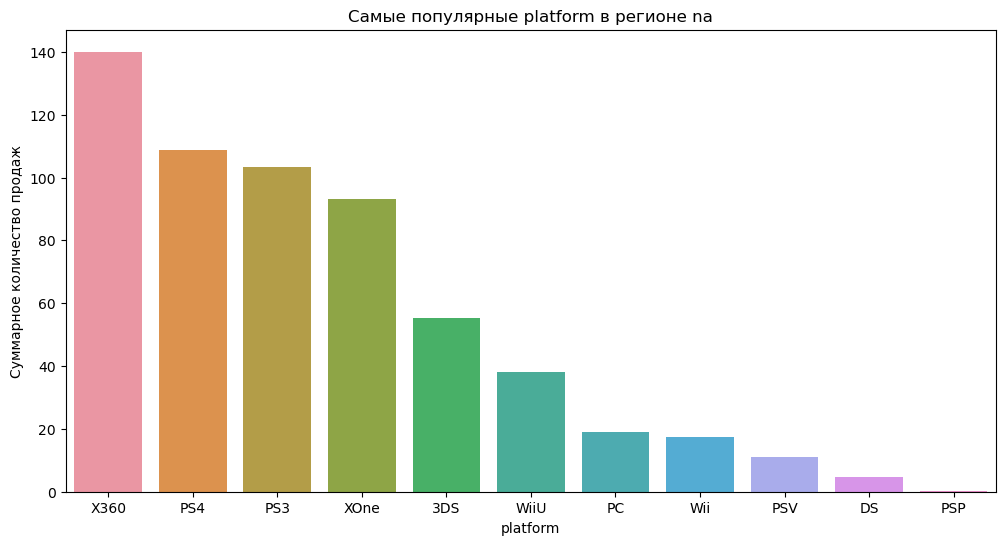


Сводная таблица по продажам в na:


,na_sales,na_sales_percent
platform,,
X360,140.05,23.7
PS4,108.74,18.4
PS3,103.38,17.5
XOne,93.12,15.8
3DS,55.31,9.4


In [70]:
pvt_table_and_plt_bar(region_df=na_df,region_name='na' ,index='platform')

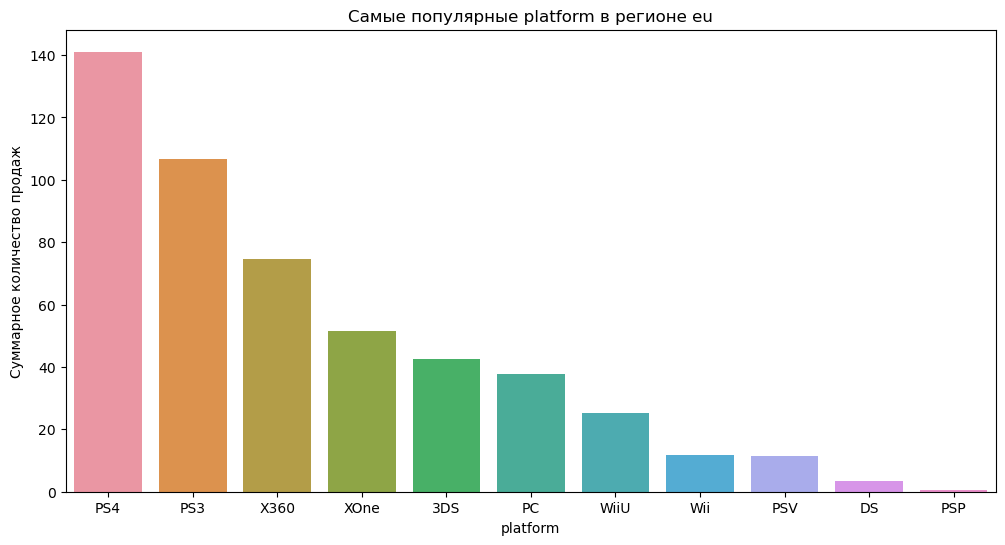


Сводная таблица по продажам в eu:


,eu_sales,eu_sales_percent
platform,,
PS4,141.09,27.8
PS3,106.85,21.1
X360,74.52,14.7
XOne,51.59,10.2
3DS,42.64,8.4


In [71]:
pvt_table_and_plt_bar(region_df=eu_df,region_name='eu' ,index='platform')

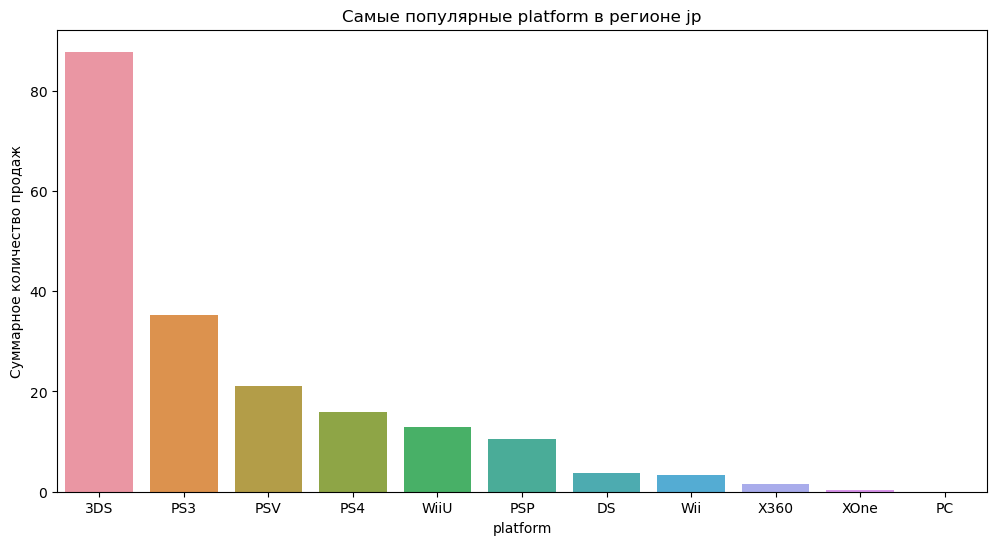


Сводная таблица по продажам в jp:


,jp_sales,jp_sales_percent
platform,,
3DS,87.79,45.6
PS3,35.29,18.3
PSV,21.04,10.9
PS4,15.96,8.3
WiiU,13.01,6.8


In [72]:
pvt_table_and_plt_bar(region_df=jp_df,region_name='jp' ,index='platform')

Самый популярные платформы в регионе NA:  X360, PS4, PS3, XOne, 3DS.

Самый популярные платформы  в регионе EU: PS4, PS3, X360, XOne, 3DS.

 Добавим в сводную таблицу процент от общих продаж для каждой платформы.

Для **Северной Америки (NA)** самыми популярными платформами являются:

**XBOX360** - 23.7% от общего числа продаж в регионе.

**PS4**- 18.4% от общего числа продаж в регионе.

**PS3** -  17.5% от общего числа продаж в регионе.

**XONE** - 15.8% от общего числа продаж в регионе.

**3DS** - 9.4% от общего числа продаж в регионе.

Для **Европейского региона самыми(EU) ** популярными платформами являются:

**PS4** -  27.8% от общего числа продаж в регионе.

**PS3** -  21.1% от общего числа продаж в регионе.

**XBOX360** -  14.7% от общего числа продаж в регионе.

**XONE** -  10.2% от общего числа продаж в регионе.

**3DS** -  8.4% от общего числа продаж в регионе.

Для **Японии(JP)** самыми популярными платформами являются:

**3DS** - у нее 45.6% от общего числа продаж в регионе.

**PS3** - у нее 18.3% от общего числа продаж в регионе.

**PSV** - у нее 10.9% от общего числа продаж в регионе.

**PS4** - у нее 8.3% от общего числа продаж в регионе.

**WIIU** - у нее 6.8% от общего числа продаж в регионе.

**Определим для пользователя каждого региона (NA, EU, JP) cамые популярные жанры (топ-5).**

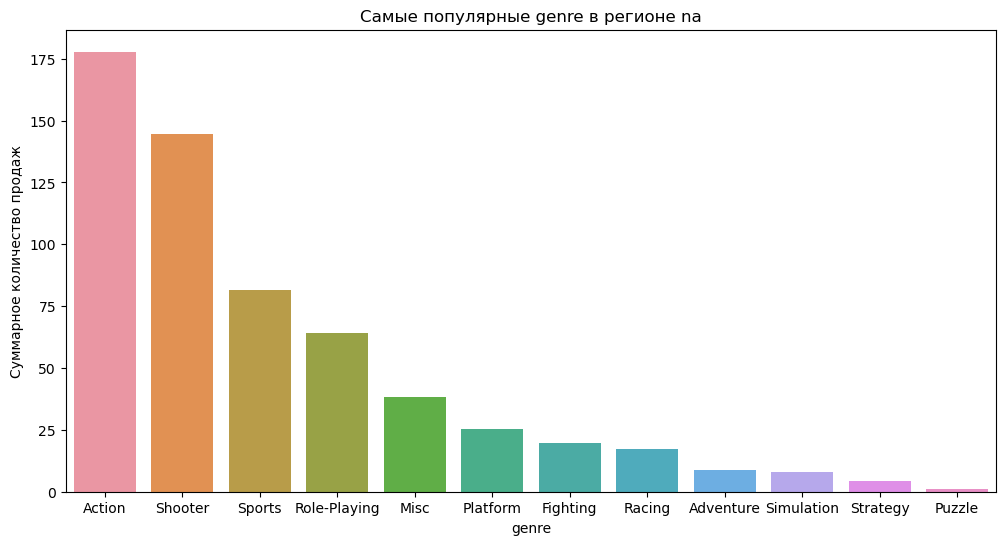


Сводная таблица по продажам в na:


,na_sales,na_sales_percent
genre,,
Action,177.84,30.1
Shooter,144.77,24.5
Sports,81.53,13.8
Role-Playing,64.00,10.8
Misc,38.19,6.5


In [73]:
pvt_table_and_plt_bar(region_df=na_df,region_name='na' ,index='genre')

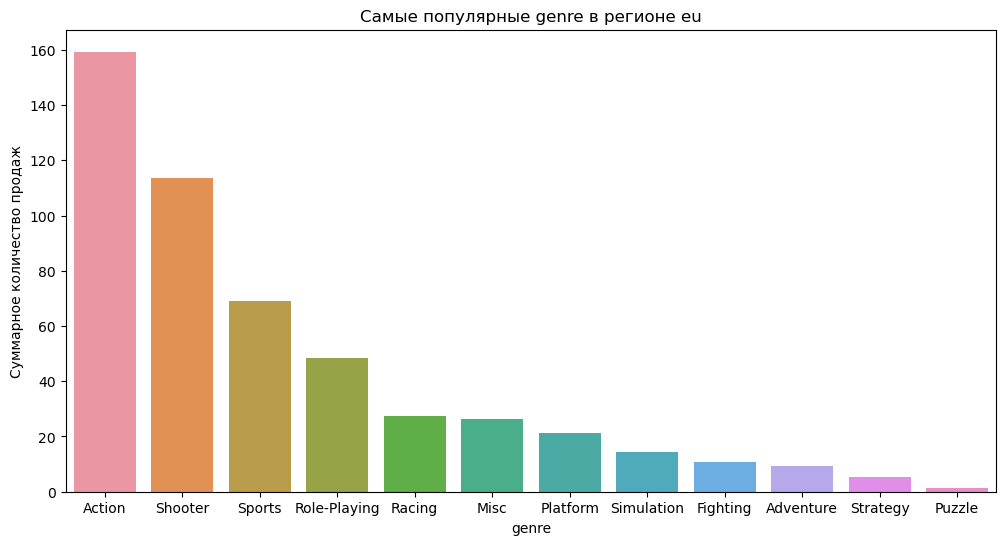


Сводная таблица по продажам в eu:


,eu_sales,eu_sales_percent
genre,,
Action,159.34,31.4
Shooter,113.47,22.4
Sports,69.08,13.6
Role-Playing,48.53,9.6
Racing,27.29,5.4


In [74]:
pvt_table_and_plt_bar(region_df=eu_df,region_name='eu' ,index='genre')

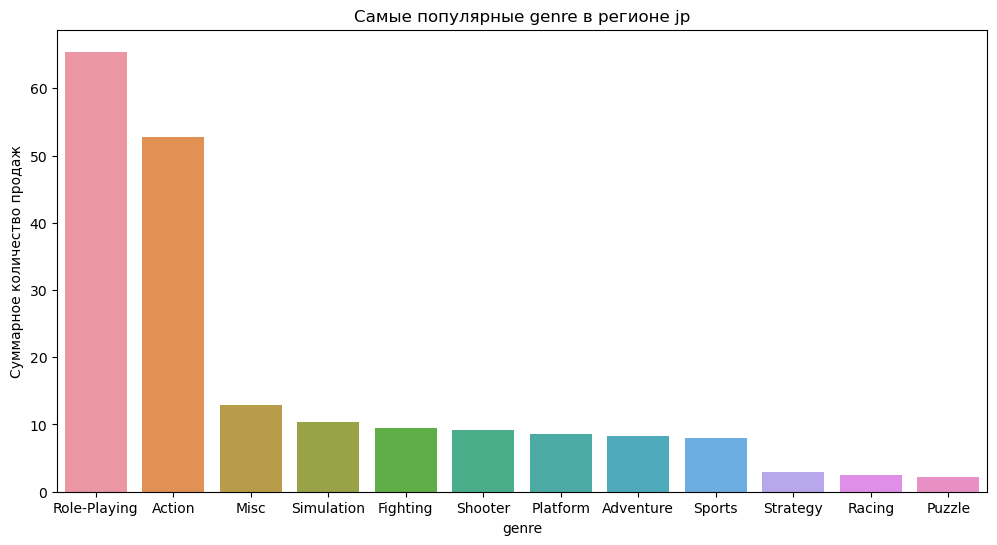


Сводная таблица по продажам в jp:


,jp_sales,jp_sales_percent
genre,,
Role-Playing,65.44,34.0
Action,52.80,27.4
Misc,12.86,6.7
Simulation,10.41,5.4
Fighting,9.44,4.9


In [75]:
pvt_table_and_plt_bar(region_df=jp_df,region_name='jp' ,index='genre')

Самые популярные жанры в регионы NA: Shooter, Platform, Sports, Fighting, Racing.

Самые популярные жанры в регионе EU: Shooter, Racing, Platform, Sports, Simulation.

Самые популярные жанры в Японии(JP) : Role-Playing, Fighting, Misc, Action, Adventure.

Как можно заметить, в каждом регионе популярны разные жанры. Различия могут объясняться как и разницей менталитета у людей в каждом регионе, так и тем, что в каждом регионе популярны разные платформы, потому что не на всех платформах возможно играть в определеные жанры. 

**Выясним влияет ли рейтинг ESRB на продажи в отдельном регионе**

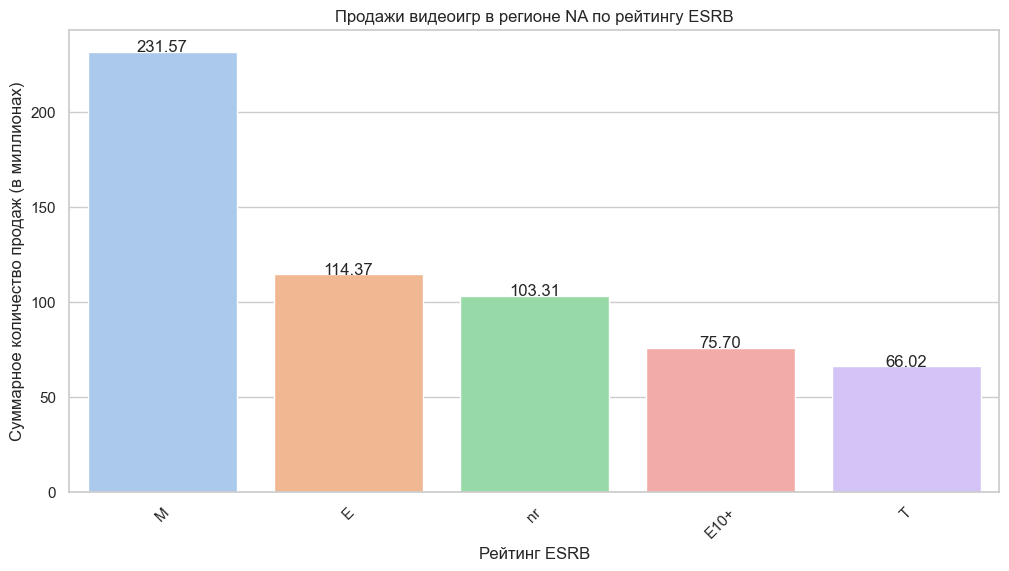

In [76]:
rating_na_sales = na_df.pivot_table(index='rating', values='na_sales', aggfunc=np.sum).sort_values(by='na_sales',ascending=False)

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.set_palette("pastel") 

ax = sns.barplot(data=rating_na_sales, x=rating_na_sales.index, y='na_sales')


plt.title('Продажи видеоигр в регионе NA по рейтингу ESRB')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Суммарное количество продаж (в миллионах)')


plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')


plt.show()

Для Северной Америки самыми популярными являются игры с возрастным ограничением:\
-Для взрослых\
-Для всех\
-Без рейтинга\
-Для подростков\
-Для всех от 10 лет

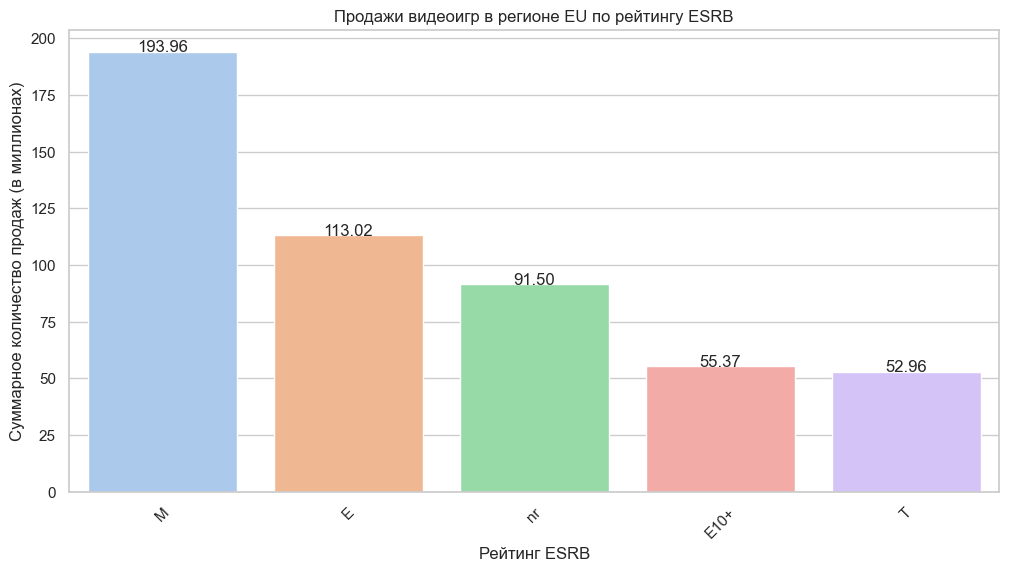

In [82]:
rating_eu_sales = eu_df.pivot_table(index='rating', values='eu_sales', aggfunc=np.sum).sort_values(by='eu_sales',ascending=False)

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.set_palette("pastel") 

ax = sns.barplot(data=rating_eu_sales, x=rating_eu_sales.index, y='eu_sales')


plt.title('Продажи видеоигр в регионе EU по рейтингу ESRB')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Суммарное количество продаж (в миллионах)')


plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')


plt.show()

Для Европы самыми популярными являются игры с возрастным ограничением:\
-Для взрослых\
-Для всех\
-Без рейтинга\
-Для подростков\
-Для всех от 10 лет

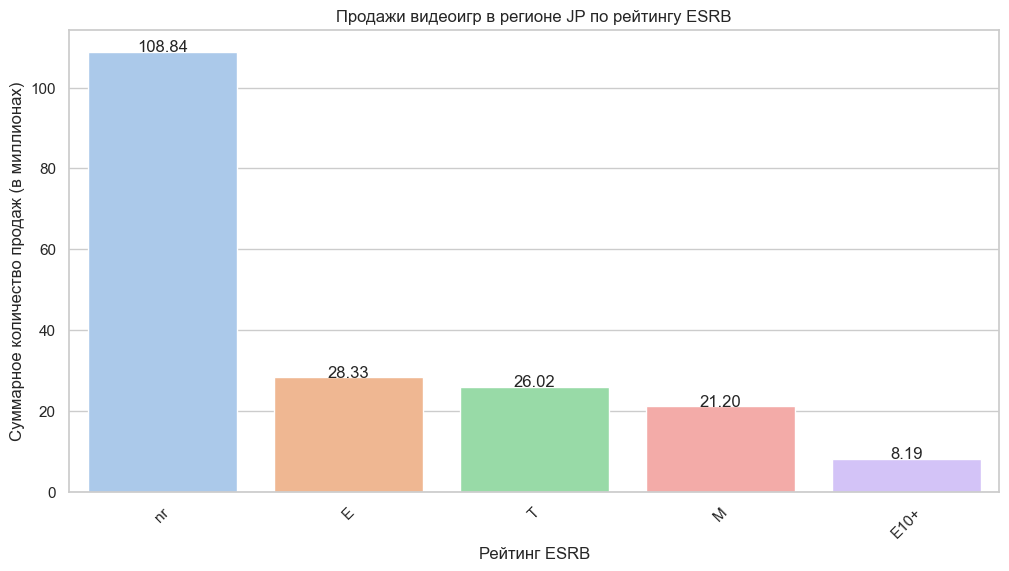

In [78]:
rating_jp_sales = jp_df.pivot_table(index='rating', values='jp_sales', aggfunc=np.sum).sort_values(by='jp_sales',ascending=False)

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.set_palette("pastel") 

ax = sns.barplot(data=rating_jp_sales, x=rating_jp_sales.index, y='jp_sales')


plt.title('Продажи видеоигр в регионе JP по рейтингу ESRB')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Суммарное количество продаж (в миллионах)')


plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')


plt.show()

Для Японии самыми популярными являются игры с возрастным ограничением:\
-Без рейтинга\
-Для всех\
-Для подростков\
-Для взрослых\
-Для всех от 10 лет
Наличие в Японии игр без рейтинга может обуславливаться тем, что в этом регионе рейтинг ESRB имеет маленькую базу или же тем, что в Японии есть свои организации по оценке рейтинга игр.


Наблюдается определенное влияние рейтинга на суммарные продажи, так ,например, в Европе и Северной Америке самые продаваемые игры с рейтингом "Для взрослых", "Для всех" 

**Вывод**


Для **Северной Америки (NA)** самыми популярными платформами являются:

**XBOX360** - 23.7% от общего числа продаж в регионе.

**PS4**- 18.4% от общего числа продаж в регионе.

**PS3** -  17.5% от общего числа продаж в регионе.

**XONE** - 15.8% от общего числа продаж в регионе.

**3DS** - 9.4% от общего числа продаж в регионе.

Для **Европейского региона самыми(EU) ** популярными платформами являются:

**PS4** -  27.8% от общего числа продаж в регионе.

**PS3** -  21.1% от общего числа продаж в регионе.

**XBOX360** -  14.7% от общего числа продаж в регионе.

**XONE** -  10.2% от общего числа продаж в регионе.

**3DS** -  8.4% от общего числа продаж в регионе.

Для **Японии(JP)** самыми популярными платформами являются:

**3DS** - у нее 45.6% от общего числа продаж в регионе.

**PS3** - у нее 18.3% от общего числа продаж в регионе.

**PSV** - у нее 10.9% от общего числа продаж в регионе.

**PS4** - у нее 8.3% от общего числа продаж в регионе.

**WIIU** - у нее 6.8% от общего числа продаж в регионе.

**Самые популярные жанры в регионы NA**: Shooter, Platform, Sports, Fighting, Racing.\
**Самые популярные жанры в регионе EU**: Shooter, Racing, Platform, Sports, Simulation.\
**Самые популярные жанры в Японии(JP)** : Role-Playing, Fighting, Misc, Action, Adventure.

Как можно заметить, в каждом регионе популярны разные жанры. Различия могут объясняться как и разницей менталитета у людей в каждом регионе, так и тем, что в каждом регионе популярны разные платформы, потому что не на всех платформах возможно играть в определеные жанры. 

Наблюдается определенное влияние рейтинга на суммарные продажи, так ,например, в Европе и Северной Америке самые продаваемые игры с рейтингом "Для взрослых", "Для всех", в Японии же популярны по разным причинам игры без рейтинга. 

Все эти данные могут быть использованы при построении торговой стратегии компании для каждого региона в отдельности и учитывая портрет пользователя для каждого региона выстраивать цепочку предложений для регионов.

# Проверка гипотез

Проверьте гипотезы

1)Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

2)Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Отфильтрем датасет games_df_for_forecast для которого user_score не будет равен 1

In [79]:
games_df_for_forecast = games_df_for_forecast[games_df_for_forecast['user_score'] != -1]
games_df_for_forecast.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,21.05,97,8.2,M
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,16.27,97,8.1,M
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,13.79,83,5.3,M
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,13.68,83,4.8,M
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,12.62,97,8.3,M


**Проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые;**

Для соответствующей воспользуемся двусторонней гипотезой, где:

H0 - Средние пользовательские рейтинги платформ Xbox One и PC равны (H0=H1)\
H1 - Средние пользовательские рейтинги платформ Xbox One и PC не равны (H0!=H1)

Возьмем уровень значимости alpha = 0.05 

In [80]:
alpha = 0.05

results = st.ttest_ind(games_df_for_forecast.query('platform == "XOne"')['user_score'], 
                       games_df_for_forecast.query('platform == "PC"')['user_score'], 
                       alternative='two-sided',
                       equal_var=False) # укажем параметру equal_var значение False, чтобы посчитать дисперсии выборок по отдельности
                                        # так как выборки имеют разные размеры
print(f'p-value: {results.pvalue}')

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-value: 0.5489537965134912
Не отвергаем нулевую гипотезу


Не отвергаем нулевую гипотезу, соотвественно, можно сказать, что средние пользовательские рейтинги для платформ PC и XOne примерно равны

**Проверим гипотезу о том, что cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные**

Для соответствующей воспользуемся двусторонней гипотезой, где:

H0 - Средние пользовательские рейтинги жанров Action и Sports равны (H0=H1)\
H1 - Средние пользовательские рейтинги жанров Action и Sports не равны(H0!=H1)

Возьмем уровень значимости alpha = 0.05 

In [81]:
alpha = 0.05

results = st.ttest_ind(games_df_for_forecast.query('genre == "Action"')['user_score'], 
                       games_df_for_forecast.query('genre == "Sports"')['user_score'], 
                       alternative='two-sided',
                       equal_var=False)

print(f'p-value: {results.pvalue}')

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-value: 5.989458066467418e-20
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу, соответсвенно, можно сказать, что средние пользовательские рейтинги жанров Action и Sports различаются.

**Вывод**
По итогам проверки гипотез можно сказать,
1)  средние пользовательские рейтинги для платформ PC и XOne примерно равны\
2)  средние пользовательские рейтинги жанров Action и Sports различаются.

<span style="color:black;font-weight:700;font-size:20px"> 
   Общий вывод
</span>
В ходе предобработки данных приведены названия столбцов к нижнему регистру. 

Строк с пропусками в колонках "name" и "genre" всего две. Возможно данные не указали при составлении таблицы. Корректного способа заполнить эти пропуски нет, поэтому удалим такие строки.

Удалили пропуски в столбце year_of_release.

В колонке "оценка критиков" есть некоторые пропущенные значения, и есть разные способы их заполнения. Один из возможных методов - использовать медианную оценку для каждой группы игр по их платформе и жанру. Однако, следует учесть, что такой подход может исказить данные.

Причины, по которым оценки критиков могли быть пропущены, могут включать технические сложности, отсутствие оценок на момент выхода игры, или просто нежелание оценивающего издания заниматься данной игрой. Это может быть связано с тем, что игра предназначена только для определенного региона, имеет необычный жанр или ориентирована на определенную возрастную категорию игроков.

В связи с этим, я предлагаю заменить пропущенные значения в этой колонке на -1, чтобы обозначить их как особую группу, учитывая, что оценка критиков является качественной переменной. Это позволит сохранить информацию о наличии пропусков и их особенностях, без искажения данных медианными значениями.

Пропуски в столбце "user_score" могли бы быть заполнены с использованием медианной оценки на основе группировки по платформе и жанру игры. Однако, следует учесть, что такой подход может исказить данные.

Поскольку оценка пользователей является качественной переменной (порядковой), я предлагаю заменить пропущенные значения в столбце "оценка пользователей" на -1, чтобы обозначить их как особую группу. Это обусловлено возможными причинами отсутствия оценок пользователей, такими как технические проблемы или отсутствие оценок из-за особенностей рынка.

Пропуски могли возникнуть, например, если игра была выпущена только для ограниченной аудитории, имеет непопулярный жанр или предназначена для конкретной возрастной группы, что могло уменьшить интерес пользователей к её оценке. Замена на -1 позволит сохранить информацию о наличии пропусков, не искажая данные средними значениями.Значение tdb означает - to be determined («будет определено»), эти значения можно обработать значениеи NaN после чего заполнить значения -1.

Игры с разным жанром могут иметь разные возрастные ограничения. Кроме того, некоторым играм могло быть не присвоено возрастное ограничение.

Пропуски с возрастной категорией заменю на маркерное значение "nr"(Нет рейтинга).

Преобразовали типы данных в столбцах 'year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales','critic_score' с float на int, так как это поможет сэкономить пямять. Также преобразуем столбец user_score c object на float.

Добавили новый столбец total_sales, который будет содержать в себе общую сумму продаж по всем регионам.

**Исследовательский анализ данных** показал , что с 1991 по 2008 год наблюдался значительный рост в производстве компьютерных игр, достигнув пика в 2008 году, когда было выпущено рекордное количество игр. После этого момента производство игр начало снижаться. До 1991 года количество выпущенных игр оставалось относительно стабильным.

Перед 1990 годом доминировали старые игровые консоли, поэтому количество выпускаемых игр было ограничено. С появлением в 1991 году нового поколения игровой консоли, началось активное распространение видеоигр, что способствовало их увеличению. 2008 год также совпадает с началом Мирового экономического кризиса, что оказало отрицательное влияние на индустрию, и количество выпускаемых игр начало снижаться.

Каждая платформа имеет свой пик продаж в определенное время, который как правило наступает спустя несколько лет после выпуска платформы. После которого следует спад и к 2016 почти все платформы на графиках имеют тенденцию спада количества выпускаемых игр.

Также можно отметить, что в среднем -  **средняя продолжительность жизненного цикла платформы - 11 лет.**

**Потенциально прибыльными платформами могут быть следующие платформы: PS4, XOne, 3DS, PC, WiiU, PSV.** Многие платформы к 2016 либо не выпускают продукцию, либо их продажи стремительно падают.Потенциально самой прибыльной я считаю , может стать PS4 так как относительно пика в 2015 году , эта платформа учитывая прошлые выводы, будет еще несколько лет иметь макс. продажи, то же самое можно сказать и про XOne

Больше всего продаж имеют платформы PS4, XOne и WiiU. Медиана этих лидеров больше, чем у других платформ, что говорит, больших медианных доходах. Также можно сказать, что у лидеров шире размах усов, что говорит о том, что в этот диапазон попадает большее число значений.

Можно отметить, для всех платформ наблюдается положительная корреляция между оценкой критиков и суммарными продажами, и также почти для всех платформ, немного слабее положительная корреляция между оценкой пользователя и суммарными продажами.

Соответсвенно, можно отметить, что чем выше оценки игры, тем с большей вероятностью у нее будут выше продажи.Поэтому интернет-магазину выгоднее продавать игры с хорошими оценками.

Анализ жанров показал, что Shooter самый популярный жанр игры по продажам. Также популярны такие жанры как: Platform, Sports, Role-Playing.

**Портрет пользовтелей регионов**

Для **Северной Америки (NA)** самыми популярными платформами являются:

**XBOX360** - 23.7% от общего числа продаж в регионе.

**PS4**- 18.4% от общего числа продаж в регионе.

**PS3** -  17.5% от общего числа продаж в регионе.

**XONE** - 15.8% от общего числа продаж в регионе.

**3DS** - 9.4% от общего числа продаж в регионе.

Для **Европейского региона самыми(EU) ** популярными платформами являются:

**PS4** -  27.8% от общего числа продаж в регионе.

**PS3** -  21.1% от общего числа продаж в регионе.

**XBOX360** -  14.7% от общего числа продаж в регионе.

**XONE** -  10.2% от общего числа продаж в регионе.

**3DS** -  8.4% от общего числа продаж в регионе.

Для **Японии(JP)** самыми популярными платформами являются:

**3DS** - у нее 45.6% от общего числа продаж в регионе.

**PS3** - у нее 18.3% от общего числа продаж в регионе.

**PSV** - у нее 10.9% от общего числа продаж в регионе.

**PS4** - у нее 8.3% от общего числа продаж в регионе.

**WIIU** - у нее 6.8% от общего числа продаж в регионе.

**Самые популярные жанры в регионы NA**: Shooter, Platform, Sports, Fighting, Racing.\
**Самые популярные жанры в регионе EU**: Shooter, Racing, Platform, Sports, Simulation.\
**Самые популярные жанры в Японии(JP)** : Role-Playing, Fighting, Misc, Action, Adventure.

Как можно заметить, в каждом регионе популярны разные жанры. Различия могут объясняться как и разницей менталитета у людей в каждом регионе, так и тем, что в каждом регионе популярны разные платформы, потому что не на всех платформах возможно играть в определеные жанры. 

Наблюдается определенное влияние рейтинга на суммарные продажи, так ,например, в Европе и Северной Америке самые продаваемые игры с рейтингом "Для взрослых", "Для всех", в Японии же популярны по разным причинам игры без рейтинга. 

Все эти данные могут быть использованы при построении торговой стратегии компании для каждого региона в отдельности и учитывая портрет пользователя для каждого региона выстраивать цепочку предложений для регионов.


По итогам **проверки гипотез** можно сказать,

средние пользовательские рейтинги для платформ PC и XOne примерно равны\
средние пользовательские рейтинги жанров Action и Sports различаются.


**Выводы анализа** 

При опредлелении популярности продукта стоит учитывать:

- Для каждого региона важно учитывать предпочтения по жанрам так как на разных рынках разные предпочтения.

- Во всех регионах есть свои популярные платформы.

- Популрность возрастного рейтинга, что бы заранее исключить в будущем связанные с этим возможные убытки.

- Мнение критиков, как возможное привлечение дополнительной игровой аудитории.

- Будущие перспективные платформы, для занимания лидирующей позиции на рынке игр под новые консоли.

- отдельное внимание стоит уделить новым платформам так как как показывает анализ в среднем они набирают пики продаж не сразу, а через определенное время, поэтому проанализировав эти платформы можно спрогнозировать выгодные платформы.

Предпочтения для каждого региона.

**Северная Америка**

Плафторма: PS4, XONE

Жанр: Shooter, Platform

Рейтинг: m, e

**Европа**

Плафторма: PS4, XONE

Жанр: Shooter, Racing

Рейтинг: m, e

**Япония**

Плафторма: PS4, WIIU

Жанр: Role-playing, Fighting

Рейтинг: nr, e